In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split

In [6]:
hmnist_28_L=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv')
hmnist_28_L

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            169        171        170        177        181        182   
1             19         57        105        140        149        148   
2            155        163        161        167        167        172   
3             25         71        116        139        136        153   
4            129        162        181        196        205        208   
...          ...        ...        ...        ...        ...        ...   
10010        172        171        173        175        164        187   
10011          2         34        108        116        114        119   
10012        122        154        162        170        179        197   
10013        137        143        141        139        147        152   
10014        149        157        157        152        151        152   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0            181        185        194        192  ...        184        186   
1            144        155        170        170  ...        172        175   
2            155        152        165        175  ...        163        178   
3            148        161        172        162  ...        125        135   
4            205        213        225        224  ...        210        197   
...          ...        ...        ...        ...  ...        ...        ...   
10010        207        210        208        206  ...        210        217   
10011        131        139        139        145  ...        173        169   
10012        200        195        202        199  ...        221        215   
10013        155        152        155        159  ...        172        171   
10014        154        163        149        145  ...        159        154   

       pixel0777  pixel0778  pixel0779  pixel0780  pixel0781  pixel0782  \
0            185        180        157        140        140        159   
1            160        144        114         89         47         18   
2            157        166        167        148        141        136   
3            138        137        111         71         32         16   
4            172        190        195        193        181        147   
...          ...        ...        ...        ...        ...        ...   
10010        221        209        185        187        192        192   
10011        168        168        143        138         83         23   
10012        205        187        209        198        187        164   
10013        175        183        177        170        169        166   
10014        145        106         67         62        103        146   

       pixel0783  label  
0            165      2  
1             18      2  
2            115      2  
3             16      2  
4             88      2  
...          ...    ...  
10010        192      0  
10011          3      0  
10012        156      0  
10013        170      0  
10014        148      6  

[10015 rows x 785 columns]

In [7]:
hmnist_28_RGB=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
hmnist_28_RGB

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0            197        154        185        202  ...        173        124   
1            123         93        126        158  ...         60         39   
2            201        142        160        206  ...        167        129   
3            143        103        119        171  ...         44         26   
4            215        162        191        225  ...        209        166   
...          ...        ...        ...        ...  ...        ...        ...   
10010        184        166        182        188  ...        208        185   
10011        121        104        103        132  ...         96         79   
10012        175        156        160        184  ...        204        181   
10013        167        127        146        169  ...        185        162   
10014        181        150        133        178  ...        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0            138        183        147        166        185        154   
1             55         25         14         28         25         14   
2            143        159        124        142        136        104   
3             36         25         12         17         25         12   
4            185        172        135        149        109         78   
...          ...        ...        ...        ...        ...        ...   
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  label  
0            177      2  
1             27      2  
2            117      2  
3             15      2  
4             92      2  
...          ...    ...  
10010        189      0  
10011          1      0  
10012        145      0  
10013        172      0  
10014        126      6  

[10015 rows x 2353 columns]

In [8]:
meta_data=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_data

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [9]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [10]:
unique_counts = meta_data.nunique()
print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64


In [11]:
meta_data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [12]:
meta_data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

In [13]:
meta_data.describe(include='all')

lesion_id      image_id     dx dx_type          age    sex  \
count         10015         10015  10015   10015  9958.000000  10015   
unique         7470         10015      7       4          NaN      3   
top     HAM_0003789  ISIC_0032258     nv   histo          NaN   male   
freq              6             1   6705    5340          NaN   5406   
mean            NaN           NaN    NaN     NaN    51.863828    NaN   
std             NaN           NaN    NaN     NaN    16.968614    NaN   
min             NaN           NaN    NaN     NaN     0.000000    NaN   
25%             NaN           NaN    NaN     NaN    40.000000    NaN   
50%             NaN           NaN    NaN     NaN    50.000000    NaN   
75%             NaN           NaN    NaN     NaN    65.000000    NaN   
max             NaN           NaN    NaN     NaN    85.000000    NaN   

       localization  
count         10015  
unique           15  
top            back  
freq           2192  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

In [14]:
print(meta_data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [15]:
median_age = meta_data['age'].median()
meta_data['age'] = meta_data['age'].fillna(median_age)

In [16]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [17]:
meta_data = meta_data.rename(columns={
    'lesion_id': 'Lesion_Id',
    'image_id': 'Image_Id',
    'dx': 'Diagnosis',
    'dx_type': 'Confirmation_Method',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Region_Of_Disease'
})

In [18]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lesion_Id            10015 non-null  object 
 1   Image_Id             10015 non-null  object 
 2   Diagnosis            10015 non-null  object 
 3   Confirmation_Method  10015 non-null  object 
 4   Age                  10015 non-null  float64
 5   Sex                  10015 non-null  object 
 6   Region_Of_Disease    10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [19]:
meta_data['Age'] = meta_data['Age'].astype(int)
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo   80  male   
1  HAM_0000118  ISIC_0025030       bkl               histo   80  male   
2  HAM_0002730  ISIC_0026769       bkl               histo   80  male   
3  HAM_0002730  ISIC_0025661       bkl               histo   80  male   
4  HAM_0001466  ISIC_0031633       bkl               histo   75  male   

  Region_Of_Disease  
0             scalp  
1             scalp  
2             scalp  
3             scalp  
4               ear

In [20]:
image_path1="/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1"
image_path2="/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2"

In [21]:
final_image_dataset = '/kaggle/input/datadacn/skin-cancer-mnist-ham10000'

In [22]:
meta_data['Image_path'] = meta_data['Image_Id'].apply(lambda x: os.path.join(final_image_dataset, f"{x}.jpg"))

In [23]:
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-Like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

meta_data['Updated_Diagnosis'] = meta_data['Diagnosis'].map(diagnosis_mapping)

In [24]:
meta_data

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0      HAM_0000118  ISIC_0027419       bkl               histo   80    male   
1      HAM_0000118  ISIC_0025030       bkl               histo   80    male   
2      HAM_0002730  ISIC_0026769       bkl               histo   80    male   
3      HAM_0002730  ISIC_0025661       bkl               histo   80    male   
4      HAM_0001466  ISIC_0031633       bkl               histo   75    male   
...            ...           ...       ...                 ...  ...     ...   
10010  HAM_0002867  ISIC_0033084     akiec               histo   40    male   
10011  HAM_0002867  ISIC_0033550     akiec               histo   40    male   
10012  HAM_0002867  ISIC_0033536     akiec               histo   40    male   
10013  HAM_0000239  ISIC_0032854     akiec               histo   80    male   
10014  HAM_0003521  ISIC_0032258       mel               histo   70  female   

      Region_Of_Disease                                         Image_path  \
0                 scalp  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
1                 scalp  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
2                 scalp  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
3                 scalp  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
4                   ear  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
...                 ...                                                ...   
10010           abdomen  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
10011           abdomen  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
10012           abdomen  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
10013              face  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
10014              back  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   

                   Updated_Diagnosis  
0      Benign Keratosis-Like Lesions  
1      Benign Keratosis-Like Lesions  
2      Benign Keratosis-Like Lesions  
3      Benign Keratosis-Like Lesions  
4      Benign Keratosis-Like Lesions  
...                              ...  
10010              Actinic Keratoses  
10011              Actinic Keratoses  
10012              Actinic Keratoses  
10013              Actinic Keratoses  
10014                       Melanoma  

[10015 rows x 9 columns]

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

meta_data['Updated_Diagnosis_Label'] = label_encoder.fit_transform(meta_data['Diagnosis'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [26]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Lesion_Id                10015 non-null  object
 1   Image_Id                 10015 non-null  object
 2   Diagnosis                10015 non-null  object
 3   Confirmation_Method      10015 non-null  object
 4   Age                      10015 non-null  int64 
 5   Sex                      10015 non-null  object
 6   Region_Of_Disease        10015 non-null  object
 7   Image_path               10015 non-null  object
 8   Updated_Diagnosis        10015 non-null  object
 9   Updated_Diagnosis_Label  10015 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 782.5+ KB


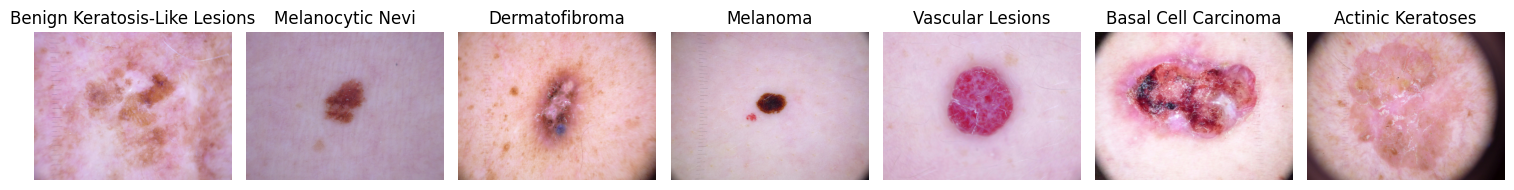

In [27]:
for i in range(len(meta_data)):
    if not os.path.isfile(meta_data['Image_path'].iloc[i]):
        raise FileNotFoundError(f"Image file not found: {meta_data['Image_path'].iloc[i]}")

class_images = meta_data.drop_duplicates(subset='Updated_Diagnosis')

def plot_class_images(class_images):
    plt.figure(figsize=(15, 5))
    num_classes = len(class_images)
    for i in range(num_classes):
        plt.subplot(1, num_classes, i + 1)
        img = plt.imread(class_images['Image_path'].iloc[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_images['Updated_Diagnosis'].iloc[i], fontsize=12)
    plt.tight_layout()
    plt.show()
plot_class_images(class_images)

In [28]:
from sklearn.utils import resample
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
from skimage import io
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

In [30]:
aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip with probability 0.5
    iaa.Affine(rotate=(-10, 10)),  # Random rotation within -10 to 10 degrees
    iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}),  # Random scaling within 90% to 110%
    iaa.Crop(percent=(0, 0.2)),# Crop images from each side by 0% to 20% of their height/width
    iaa.Affine(shear=(-5, 5)),  # Random shear within -5 to 5 degrees
    iaa.GaussianBlur(sigma=(0, 0.5)),  # Gaussian blur with a small sigma
    iaa.AdditiveGaussianNoise(scale=(0, 0.01*255)),  # Small additive Gaussian noise
    iaa.ContrastNormalization((0.9, 1.1)),  # Slightly change contrast
    iaa.CLAHE(clip_limit=(1, 2))  # Apply CLAHE with a moderate clip limit
])

augmented_images_dir = "/kaggle/working/augmentend_iamges3"
os.makedirs(augmented_images_dir, exist_ok=True)

class_counts = meta_data['Diagnosis'].value_counts()
max_count = class_counts.max()
balanced_samples = []

for label in class_counts.index:
    class_subset = meta_data[meta_data['Diagnosis'] == label]

    if len(class_subset) < max_count:
        n_augmentations = max_count - len(class_subset)
        augmented_samples = []
        for i in range(n_augmentations):
            sample = class_subset.sample(n=1, random_state=42).iloc[0]
            img_path = sample['Image_path']
            img = io.imread(img_path)
            augmented_image = aug_pipeline(image=img)

            augmented_image_path = os.path.join(augmented_images_dir, f'{label}_augmented_{i}.jpg')
            io.imsave(augmented_image_path, augmented_image)

            augmented_sample = sample.copy()
            augmented_sample['Image_path'] = augmented_image_path
            augmented_samples.append(augmented_sample)

        augmented_df = pd.DataFrame(augmented_samples)
        class_oversampled = pd.concat([class_subset, augmented_df], ignore_index=True)
    else:
        class_oversampled = class_subset

    balanced_samples.append(class_oversampled)

balanced_dataset = pd.concat(balanced_samples).reset_index(drop=True)


print("Dataset balanced successfully!")

/opt/conda/lib/python3.10/site-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


Dataset balanced successfully!


In [31]:
balanced_dataset.to_csv('/kaggle/working/balanced_dataset.csv', index=False)

In [32]:
meta_data = balanced_dataset
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0  HAM_0001751  ISIC_0024698        nv           consensus   70    male   
1  HAM_0000559  ISIC_0024693        nv           follow_up   45  female   
2  HAM_0004932  ISIC_0032212        nv           follow_up   45  female   
3  HAM_0004516  ISIC_0025775        nv           follow_up   45  female   
4  HAM_0006510  ISIC_0029828        nv           follow_up   55  female   

  Region_Of_Disease                                         Image_path  \
0              face  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
1   upper extremity  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
2              foot  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
3              neck  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   
4   lower extremity  /kaggle/input/datadacn/skin-cancer-mnist-ham10...   

  Updated_Diagnosis  Updated_Diagnosis_Label  
0  Melanocytic Nevi                        5  
1  Melanocytic Nevi                        5  
2  Melanocytic Nevi                        5  
3  Melanocytic Nevi                        5  
4  Melanocytic Nevi                        5

In [33]:
X = meta_data.drop(columns=['Updated_Diagnosis_Label'])
y = meta_data['Updated_Diagnosis_Label']

print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (46935, 9)
Shape of target variable (y): (46935,)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

Found 30038 validated image filenames belonging to 7 classes.
Found 7510 validated image filenames belonging to 7 classes.
Found 9387 validated image filenames belonging to 7 classes.


In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten, Dense
from keras.layers import LeakyReLU

In [37]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Hàm tạo một khối residual cơ bản
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    
    # Convolution layer with same padding to match shortcut shape
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut and x
    x = Add()([x, shortcut])
    x = ReLU()(x)

    return x

# Tạo mô hình ResNet
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# Layer 1: Convolution + BatchNormalization + ReLU
x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

# MaxPooling
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

# Residual Blocks
x = residual_block(x, 64)
x = residual_block(x, 64)

x = residual_block(x, 128, kernel_size=3, stride=2)
x = residual_block(x, 128)

x = residual_block(x, 256, kernel_size=3, stride=2)
x = residual_block(x, 256)

x = residual_block(x, 512, kernel_size=3, stride=2)
x = residual_block(x, 512)

# Flatten
x = Flatten()(x)

# Dense Layer
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(7, activation='softmax')(x)  # Số lớp đầu ra là 7 tương ứng với số lớp trong Updated_Diagnosis

# Xây dựng mô hình
model = Model(inputs=inputs, outputs=outputs)

# Tóm tắt mô hình
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_3[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_4[0][0]  

 Total params: 130,765,447 (498.83 MB)

 Trainable params: 130,755,847 (498.79 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [38]:
#loss for categorical value and adam perform best
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer =Adam(learning_rate = 0.0001),
              metrics=["accuracy"])

In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint, LearningRateScheduler

In [40]:
#.h5 = Hierarchical Data Format Ver. 5 file, verbose =1, to see execution
tensorboard= TensorBoard(log_dir="logs")
checkpoint= ModelCheckpoint("resnet.keras",
                           monitor="val_accuracy", verbose=1,
                           mode="auto", save_best_only=True)
#monitor: quantity to be monitored.
#factor: factor by which the learning rate will be reduced.
#patience: number of epochs with no improvement after which learning rate will be reduced.
#verbose: int. 0: quiet, 1: update messages.
#min_delta: early stopping of epochs
#cooldown: number of epochs to wait before resuming normal operation after
reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.3,
                           patience=5,verbose=1,
                           mode="auto", min_delta=0.010)

In [41]:
history = model.fit(train_generator,
                   validation_data=val_generator,
                   epochs=10, verbose=1,
                   callbacks =[tensorboard, checkpoint, reduce_lr])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732331336.816249     139 service.cc:145] XLA service 0x7a0b7c0880a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732331336.816297     139 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732331336.816301     139 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732331360.780966     139 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6858 - loss: 1.7300

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.24687, saving model to resnet.keras
301/301 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.6863 - loss: 1.7265 - val_accuracy: 0.2469 - val_loss: 2.4894 - learning_rate: 1.0000e-04
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9256 - loss: 0.2284
Epoch 2: val_accuracy improved from 0.24687 to 0.89281, saving model to resnet.keras
301/301 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.9256 - loss: 0.2284 - val_accuracy: 0.8928 - val_loss: 0.3246 - learning_rate: 1.0000e-04
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9306 - loss: 0.2080
Epoch 3: val_accuracy did not improve from 0.89281
301/301 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.9306 - loss: 0.2080 - val_accuracy: 0.8237 - val_loss: 2.1825 - learning_rate: 1.0000e-04
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9329 - loss: 0.1939
Epoch 4: val_accuracy did not improve from 0.89281
301/301 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/

In [44]:
model.save('/kaggle/working/model_resnet.h5')

In [47]:
from tensorflow.keras.models import load_model

# Load model từ file
model = load_model("/kaggle/working/model_resnet.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted probabilities: [0.00139312 0.00592617 0.0230099  0.00131567 0.8814254  0.05945842
 0.0274714 ]
Predicted class index: 4, class name: ('nv', ' melanocytic nevi'), max probability: 0.8814253807067871


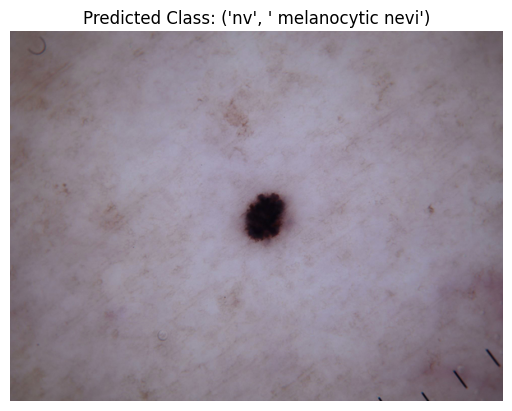

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted probabilities: [2.1611148e-04 3.2542883e-03 9.4592309e-04 1.0813402e-04 1.1815431e-01
 2.4545574e-01 6.3186550e-01]
Predicted class index: 6, class name: ('mel', 'melanoma'), max probability: 0.6318655014038086


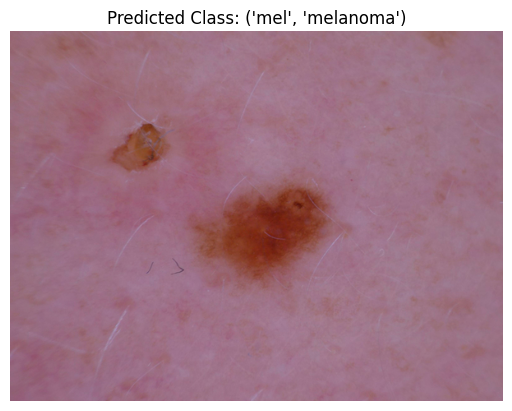

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted probabilities: [2.3955123e-05 4.1778694e-04 8.0249512e-05 3.6597146e-05 8.0528660e-03
 7.5439052e-03 9.8384470e-01]
Predicted class index: 6, class name: ('mel', 'melanoma'), max probability: 0.9838446974754333


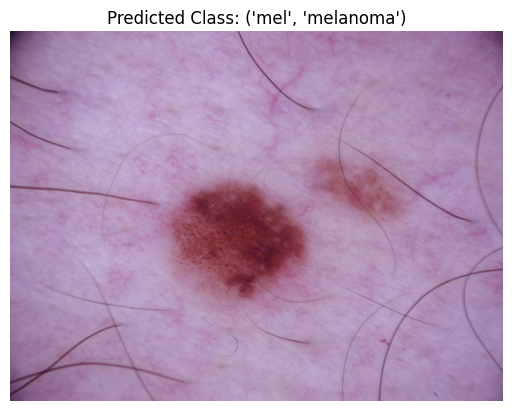

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted probabilities: [2.7692849e-06 1.4424975e-02 1.3340381e-05 1.4409734e-07 3.4588647e-01
 2.8101483e-01 3.5865748e-01]
Predicted class index: 6, class name: ('mel', 'melanoma'), max probability: 0.35865747928619385


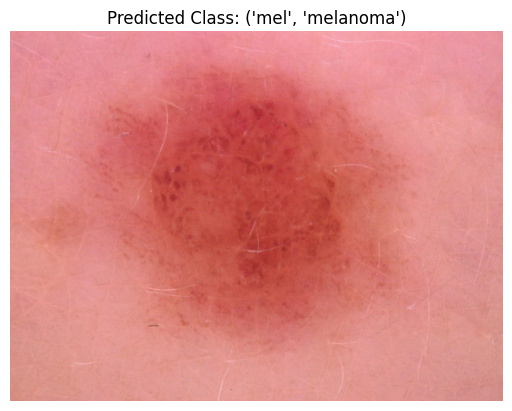

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted probabilities: [2.1022468e-05 2.5326209e-02 1.8496808e-05 4.0878456e-07 1.5771997e-01
 5.9149897e-01 2.2541489e-01]
Predicted class index: 5, class name: ('vasc', ' pyogenic granulomas and hemorrhage'), max probability: 0.5914989709854126


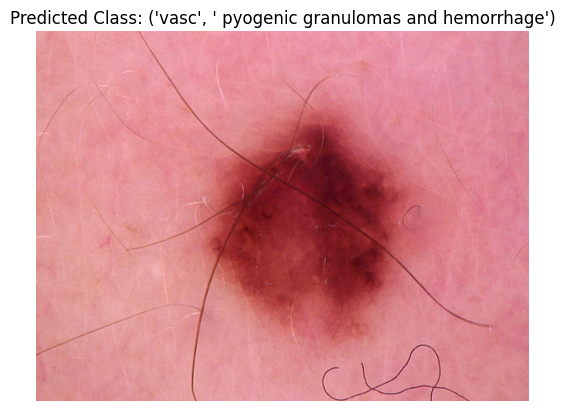

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted probabilities: [0.00239262 0.02890289 0.01695577 0.00453467 0.34053522 0.08871948
 0.51795936]
Predicted class index: 6, class name: ('mel', 'melanoma'), max probability: 0.5179593563079834


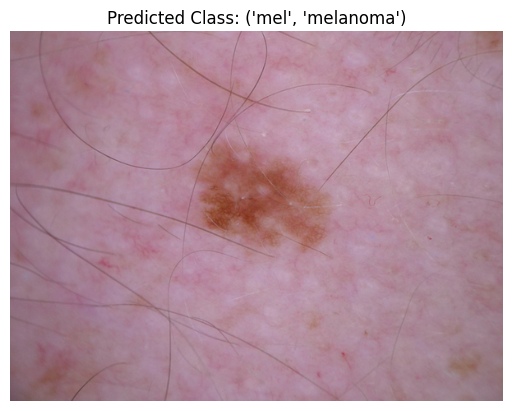

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted probabilities: [4.3986665e-06 1.0184542e-04 1.6028594e-05 2.8790241e-06 4.2955284e-03
 6.8503837e-03 9.8872900e-01]
Predicted class index: 6, class name: ('mel', 'melanoma'), max probability: 0.9887290000915527


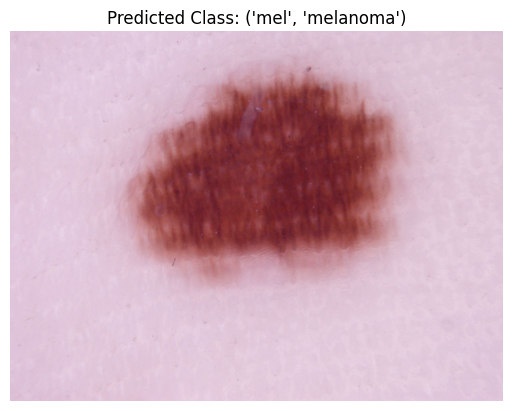

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted probabilities: [0.00091325 0.05684806 0.00647261 0.0019143  0.8128326  0.01709429
 0.10392486]
Predicted class index: 4, class name: ('nv', ' melanocytic nevi'), max probability: 0.8128325939178467


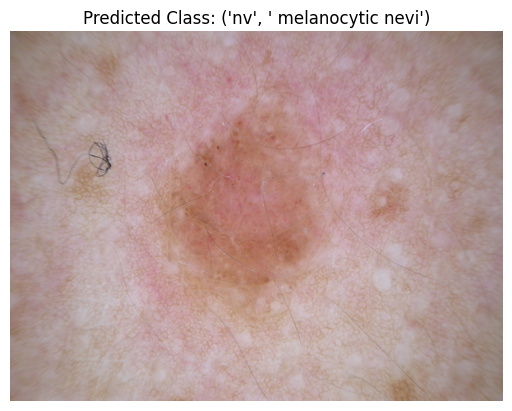

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted probabilities: [1.4764780e-05 1.0993292e-02 1.1250024e-05 1.9284029e-07 5.5919610e-02
 8.7386352e-01 5.9197344e-02]
Predicted class index: 5, class name: ('vasc', ' pyogenic granulomas and hemorrhage'), max probability: 0.8738635182380676


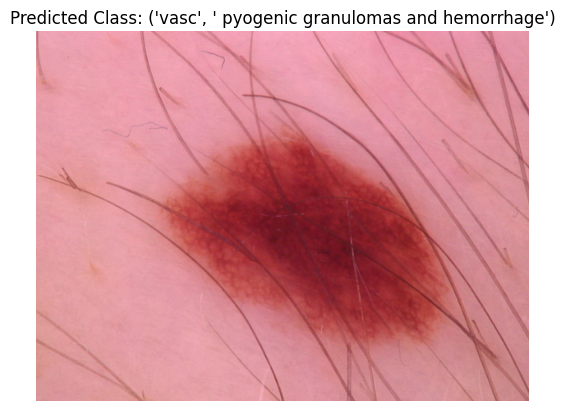

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted probabilities: [1.0260277e-06 4.5167508e-05 5.7797206e-06 2.0589409e-06 3.5745983e-03
 1.8702988e-03 9.9450111e-01]
Predicted class index: 6, class name: ('mel', 'melanoma'), max probability: 0.9945011138916016


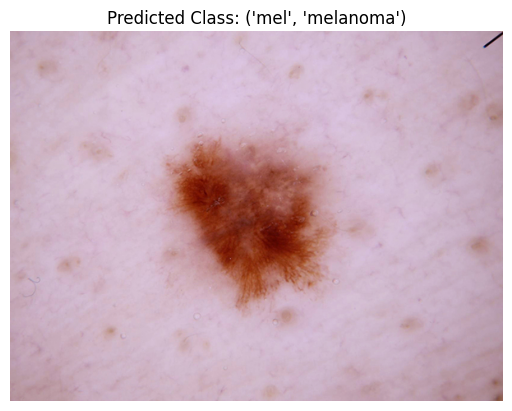

In [48]:
import os
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}
srcdir = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'
count = 0

# Load the model
model = load_model("/kaggle/working/model_resnet.h5")

for temp in os.listdir(srcdir)[:10]:
    img_path = os.path.join(srcdir, temp)
    img = cv2.imread(img_path)

    if img is not None:
        # Resize the image to the required input size of the model (224x224)
        img_resized = cv2.resize(img, (224, 224))

        # Normalize the image
        img_normalized = img_resized / 255.0

        # Predict the class
        result = model.predict(img_normalized.reshape(1, 224, 224, 3))
        print(f'Predicted probabilities: {result[0]}')  # Debugging line

        max_prob = max(result[0])
        class_ind = list(result[0]).index(max_prob)
        class_name = classes[class_ind]

        print(f'Predicted class index: {class_ind}, class name: {class_name}, max probability: {max_prob}')  # Debugging line

        # Display the image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Predicted Class: {class_name}')
        plt.axis('off')
        plt.show()

        count += 1
        if count > 10:
            break
    else:
        print(f'Failed to read image: {img_path}')


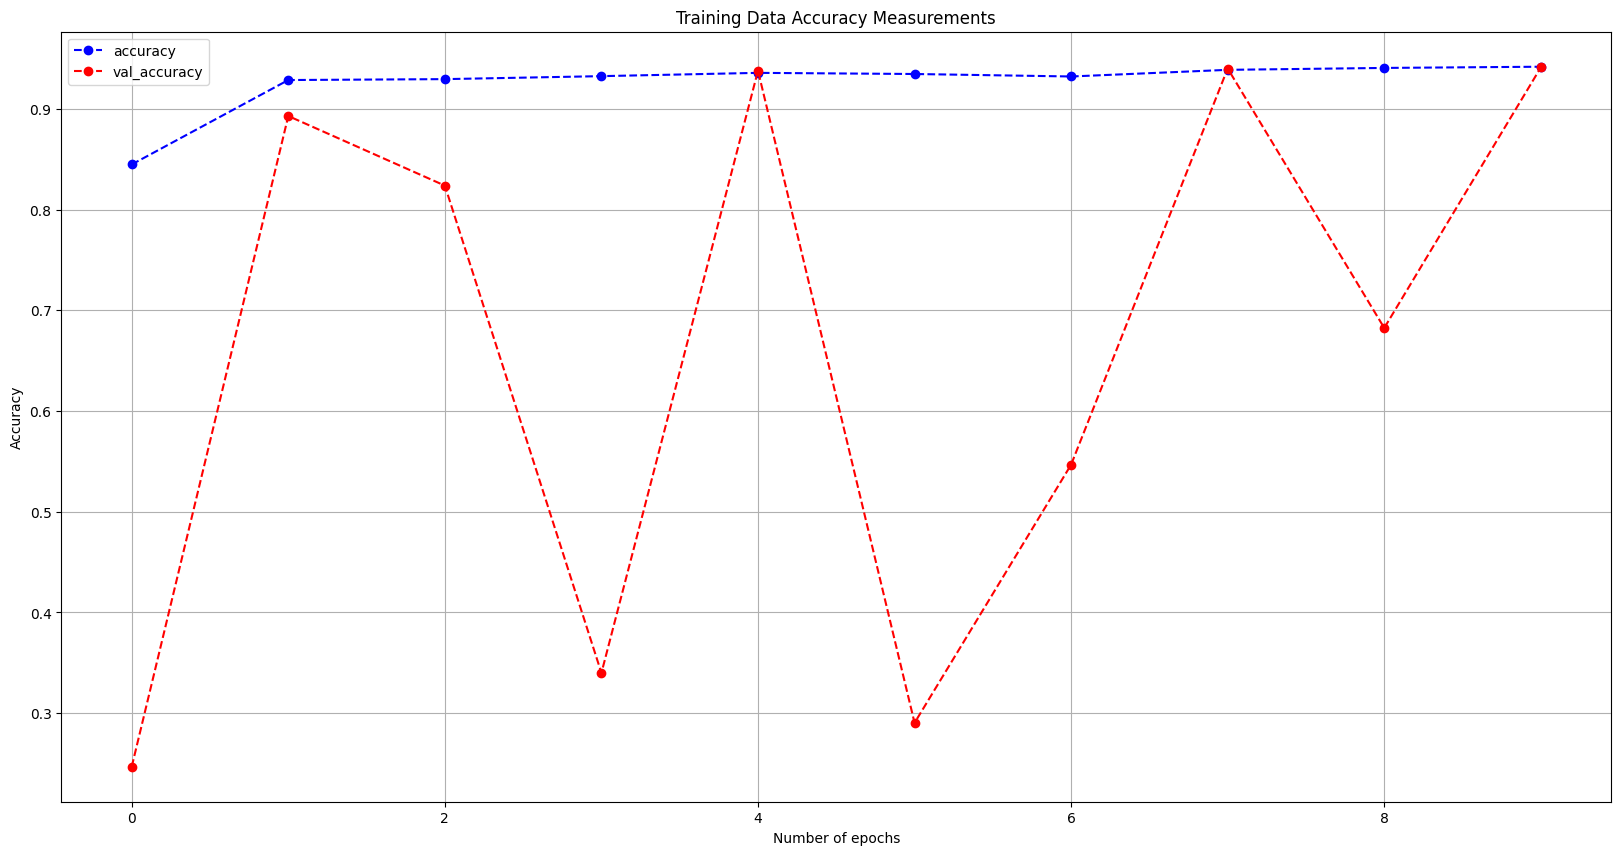

In [49]:
def accuracy(history):
    fig = plt.figure(figsize=(20,10))


    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
accuracy(history)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 62s 645ms/step
Accuracy: 0.94
Sensitivity: 1.00
Specificity: 0.98
Precision: 0.95
F1-Score: 0.94
AUC: 1.00


94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 392ms/step


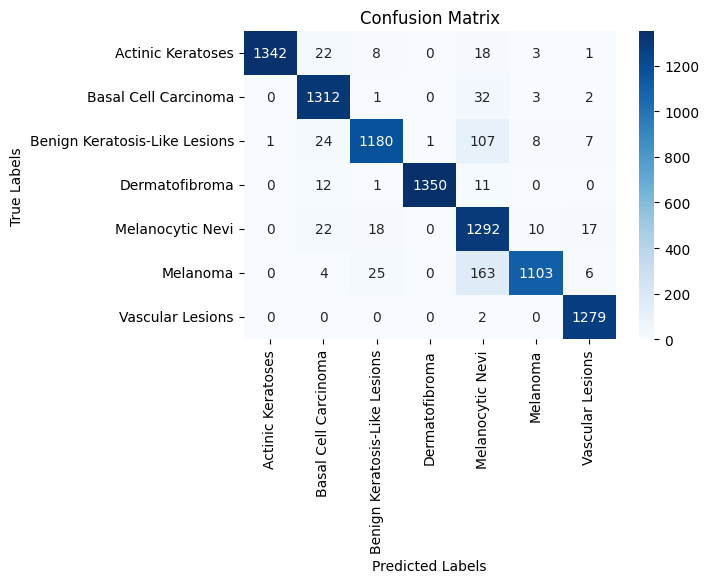

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

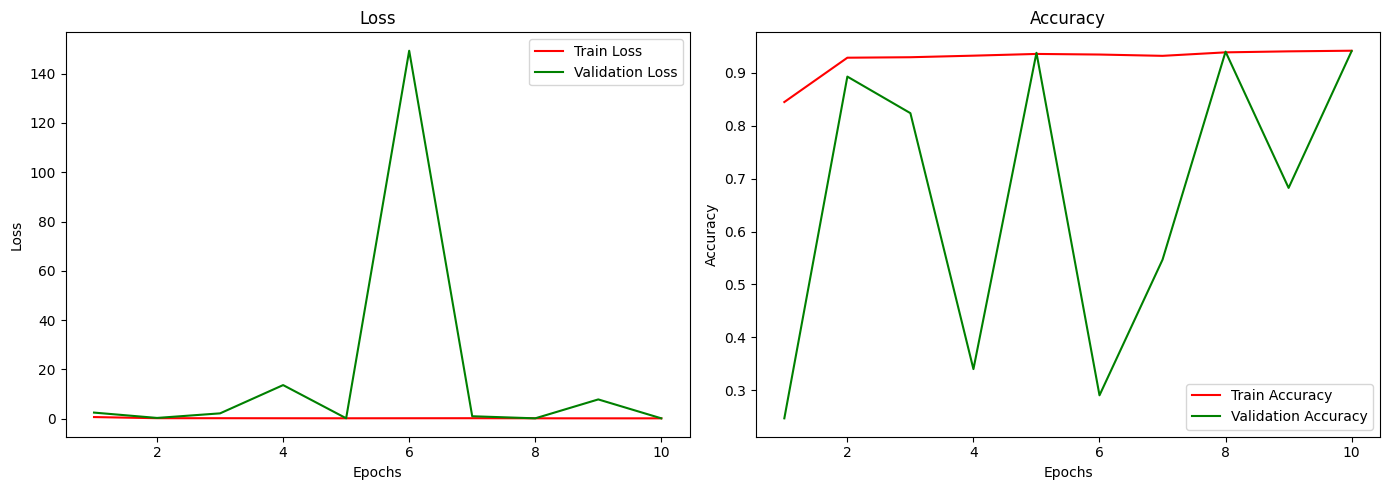

In [52]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()